T6DQ2

Consider a real-world scenario where you need to conduct a statistical test for paired data, multiple population means, or variance comparisons. Describe the problem, the data, and the research question. Discuss the appropriate statistical test that you would use to address the research question and explain why. Perform the test. Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations. How can you use the results to inform decisions or actions in the real-world scenario?

**H0** : dnew = dold (There is no effect of new coating on driving distance of the ball.)

**Ha** : dnew ≠ dold (There is some effect of new coating on driving distance of the ball.)

significance level: 95% 

signficiance value: 0.05

In [6]:
#import libraires
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [7]:
#read data
golf_balls = pd.read_csv('golf.csv')
golf_balls .head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


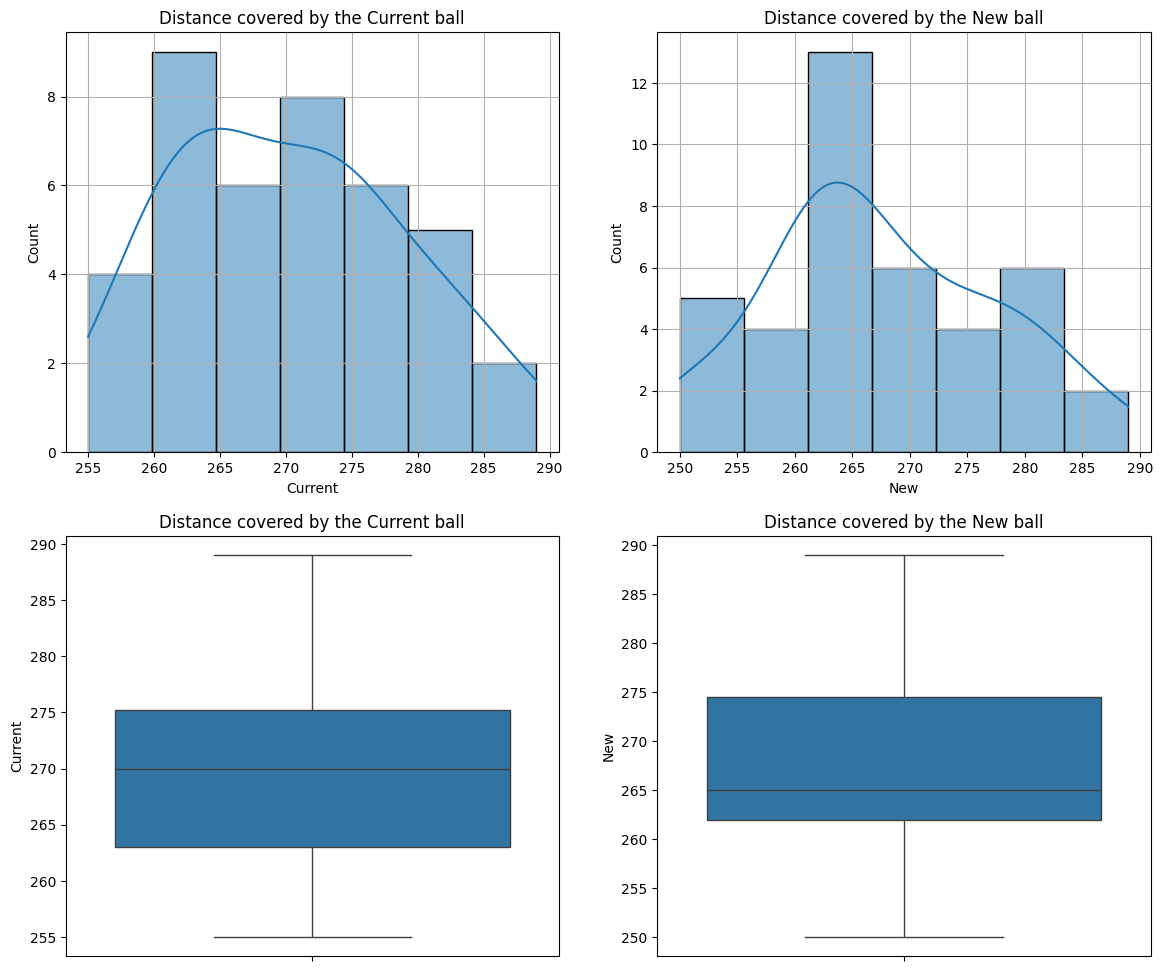

In [9]:
# Plot the histogram for distances covered for both the current and new

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(14,12))
sns.histplot(golf_balls['Current'], ax=ax1[0], kde=True)
sns.histplot(golf_balls['New'], ax=ax1[1], kde=True)
sns.boxplot(golf_balls['Current'], ax=ax2[0])
sns.boxplot(golf_balls['New'], ax=ax2[1])
ax1[0].set_title("Distance covered by the Current ball")
ax1[0].grid()
ax1[1].set_title("Distance covered by the New ball")
ax1[1].grid()
ax2[0].set_title("Distance covered by the Current ball")
ax2[1].set_title("Distance covered by the New ball")
plt.show()

               Current    New
Min             255.00  250.0
25 Percentile   263.00  262.0
Median          270.00  265.0
75 Percentile   275.25  274.5
Max             289.00  289.0



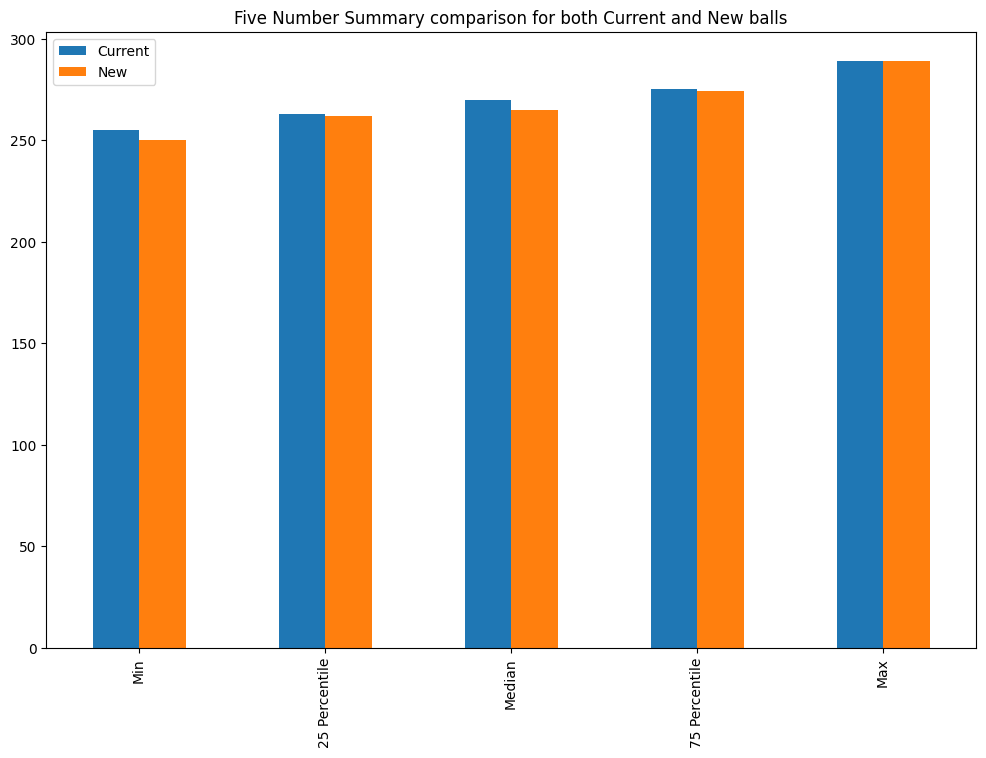

In [11]:
# Comparing the 5 number summary in tabular format
five_num_summary_current = np.percentile(golf_balls['Current'], [0,25,50,75,100])
five_num_summary_new = np.percentile(golf_balls['New'], [0,25,50,75,100])

five_num_summary = pd.DataFrame(np.concatenate((five_num_summary_current.reshape(-1,1), five_num_summary_new.reshape(-1,1)), axis=1)
                                ,columns = ['Current', 'New'], index=['Min', '25 Percentile', 'Median', '75 Percentile', 'Max'])

# Print the table
print(five_num_summary)
print()

# Plot the comparison
five_num_summary.plot(kind='bar', figsize=(12,8))
plt.title("Five Number Summary comparison for both Current and New balls")
plt.show()

The current ball has a slightly higher median value. the rest of the values are close enoguh.
It's a normal distribution

t-test 

In [16]:
# Calculate the t_stat and p_value from 
t_stat, p_value = stats.ttest_ind(golf_balls['Current'], golf_balls['New'])
t_stat, p_value
print("The t_stat value is:", t_stat, " The p_value is: ", p_value)

The t_stat value is: 1.3283615935245678  The p_value is:  0.18793228491854666


The p value from the test is 0.87 whih is greater than 0.05. We don't reject the null hypothesis.